In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/Employee.csv
data/diamonds.csv


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [4]:
df=pd.read_csv("data/Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [8]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [9]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [10]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [11]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

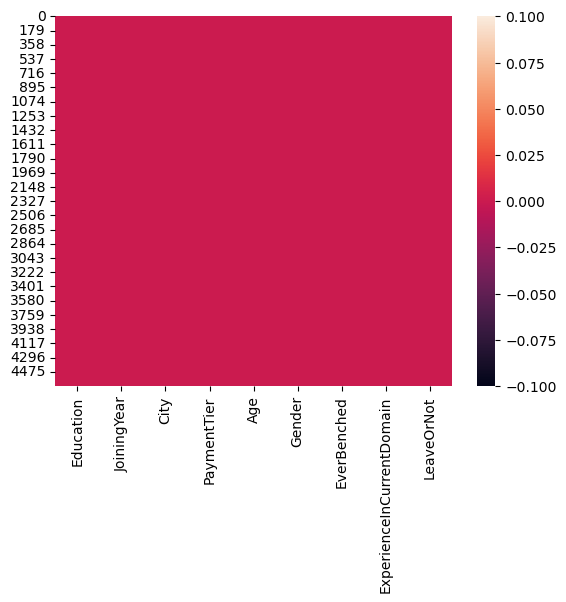

In [12]:
sns.heatmap(df.isnull())
plt.show()

In [13]:
df.shape

(4653, 9)

In [14]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [15]:
edu=df['Education'].value_counts().reset_index()
edu

,index,Education
0,Bachelors,3601
1,Masters,873
2,PHD,179


<BarContainer object of 3 artists>

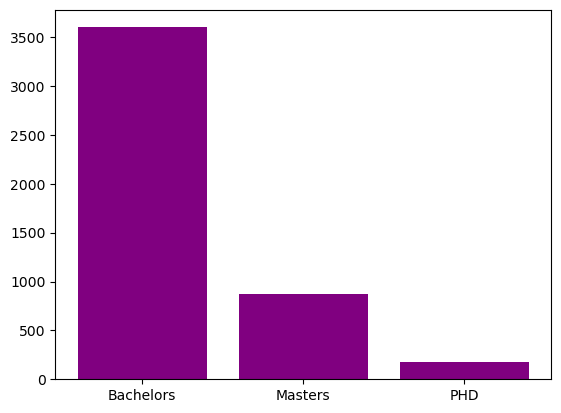

In [16]:
plt.bar(df.Education.unique(), df.Education.value_counts(),color='purple')

Text(0.5, 1.0, 'Different Degree Holder')

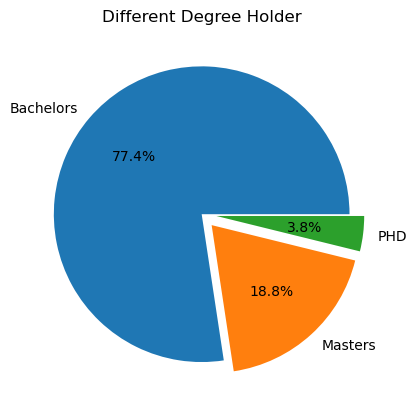

In [17]:
plt.pie(x=df['Education'].value_counts(),labels=df['Education'].value_counts().index,autopct='%1.1f%%',explode=[0,0.1,0.1])
plt.title("Different Degree Holder")

In [18]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [19]:
city=df['City'].value_counts().reset_index()
city

,index,City
0,Bangalore,2228
1,Pune,1268
2,New Delhi,1157


<BarContainer object of 3 artists>

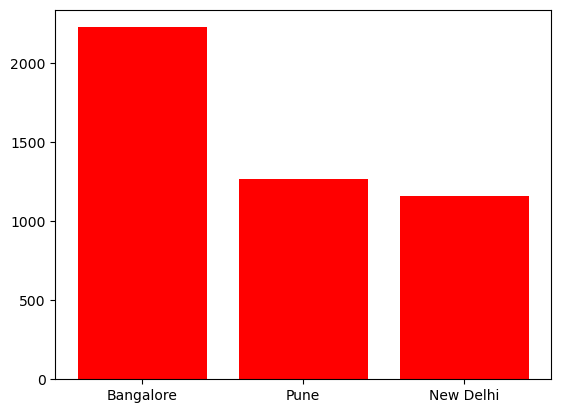

In [20]:
plt.bar(df['City'].unique(),df.City.value_counts(),color='red')

Text(0.5, 1.0, 'Employee from different City')

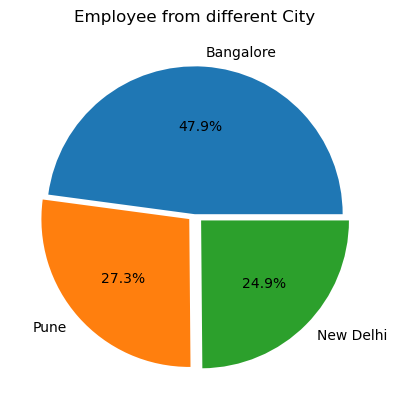

In [21]:
plt.pie(x=df['City'].value_counts(),labels=df['City'].value_counts().index,autopct='%0.1f%%',explode=[0,0.05,0.06])
plt.title("Employee from different City")

In [22]:
df['PaymentTier'].unique()

array([3, 1, 2])

In [23]:
pay_tier=df['PaymentTier'].value_counts().reset_index()
pay_tier

,index,PaymentTier
0,3,3492
1,2,918
2,1,243


<BarContainer object of 3 artists>

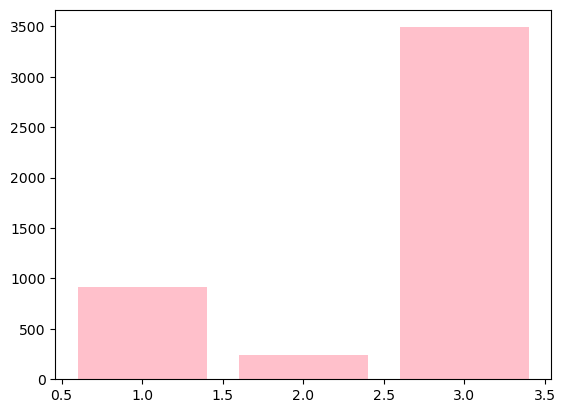

In [24]:
plt.bar(df.PaymentTier.unique(),df.PaymentTier.value_counts(),color='pink')

Text(0.5, 1.0, 'Employees from different PaymentTier')

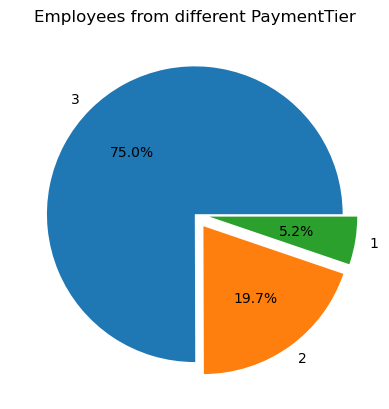

In [25]:
plt.pie(x=df.PaymentTier.value_counts(),labels=df.PaymentTier.value_counts().index,autopct="%1.1f%%",explode=[0,0.1,0.1])
plt.title("Employees from different PaymentTier")

In [26]:
df['LeaveOrNot'].unique()

array([0, 1])

In [27]:
leave=df['LeaveOrNot'].value_counts().reset_index()
leave

,index,LeaveOrNot
0,0,3053
1,1,1600


<BarContainer object of 2 artists>

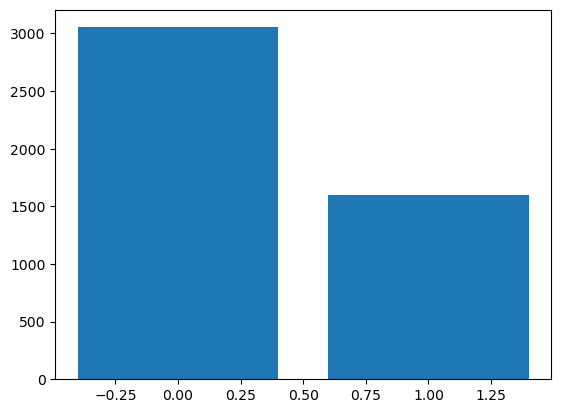

In [28]:
plt.bar(df.LeaveOrNot.unique(),df.LeaveOrNot.value_counts())

Text(0.5, 1.0, 'Rate of LeaveOrNot')

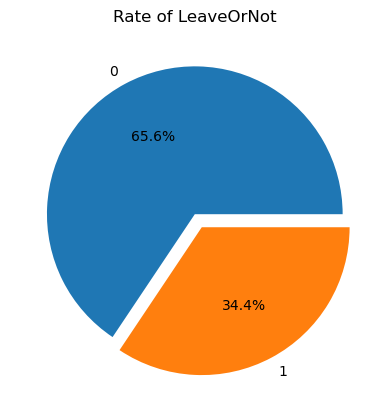

In [29]:
plt.pie(x=df.LeaveOrNot.value_counts(),labels=df.LeaveOrNot.value_counts().index,autopct="%1.1f%%",explode=[0,0.1])
plt.title("Rate of LeaveOrNot")

In [30]:
df['Age'].unique()

array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41])

In [31]:
age=df['Age'].value_counts().reset_index()
age=age.sort_values(by='Age')
age

,index,Age
19,23,48
18,22,49
17,41,82
16,35,123
15,33,124
14,31,125
13,39,131
12,32,132
11,40,134
10,38,136


<BarContainer object of 20 artists>

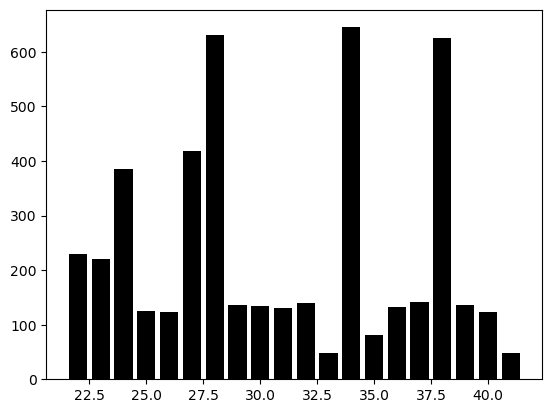

In [32]:
plt.bar(df.Age.unique(),df.Age.value_counts(),color='black')

Text(0.5, 1.0, 'Ratio Of Different Ages of Employees')

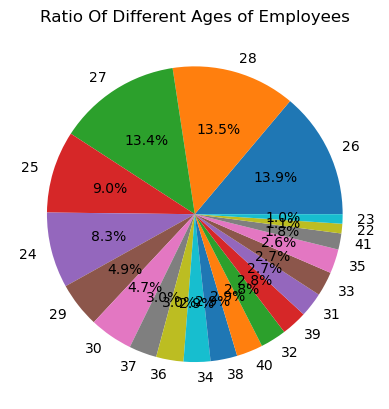

In [33]:
plt.pie(x=df.Age.value_counts(),labels=df.Age.value_counts().index,autopct="%1.1f%%")
plt.title("Ratio Of Different Ages of Employees")

In [34]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [35]:
gender=df['Gender'].value_counts().reset_index()
gender

,index,Gender
0,Male,2778
1,Female,1875


<BarContainer object of 2 artists>

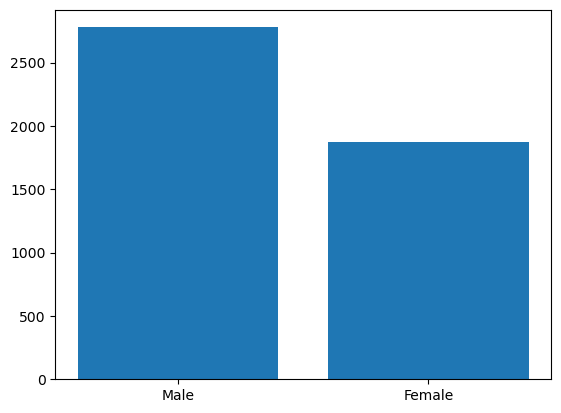

In [36]:
plt.bar(df.Gender.unique(),df.Gender.value_counts())

Text(0.5, 1.0, 'Gender Ratio')

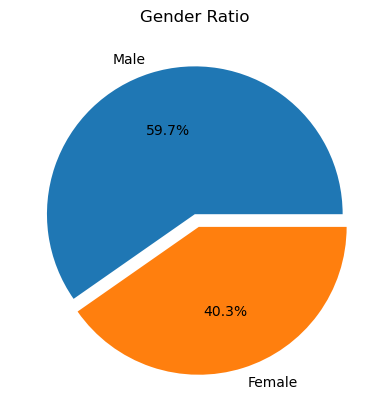

In [37]:
plt.pie(x=df.Gender.value_counts(),labels=df.Gender.value_counts().index,autopct="%0.1f%%",explode=[0,0.09])
plt.title("Gender Ratio")

In [38]:
df['EverBenched'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
ever_benched=df['EverBenched'].value_counts().reset_index()
ever_benched

,index,EverBenched
0,No,4175
1,Yes,478


<BarContainer object of 2 artists>

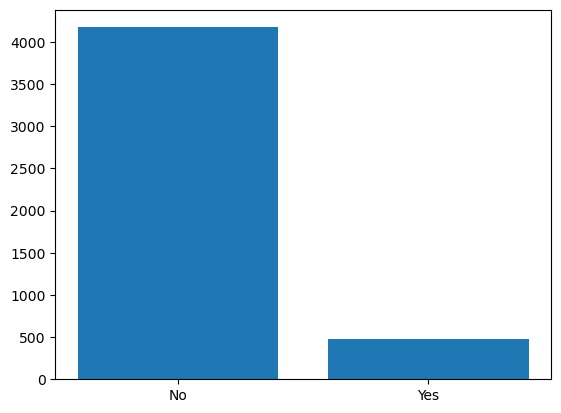

In [40]:
plt.bar(df.EverBenched.unique(),df.EverBenched.value_counts())

Text(0.5, 1.0, 'Ratio of EverBenched')

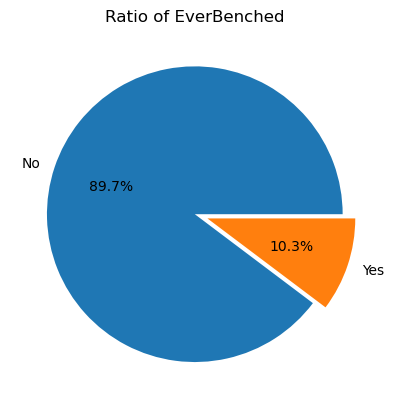

In [41]:
plt.pie(x=df.EverBenched.value_counts(),labels=df.EverBenched.value_counts().index,autopct="%1.1f%%",explode=[0,0.09])
plt.title("Ratio of EverBenched")

In [42]:
df['ExperienceInCurrentDomain'].unique()

array([0, 3, 2, 5, 1, 4, 7, 6])

In [43]:
experience=df['ExperienceInCurrentDomain'].value_counts().reset_index()
experience

,index,ExperienceInCurrentDomain
0,2,1087
1,4,931
2,5,919
3,3,786
4,1,558
5,0,355
6,7,9
7,6,8


<BarContainer object of 8 artists>

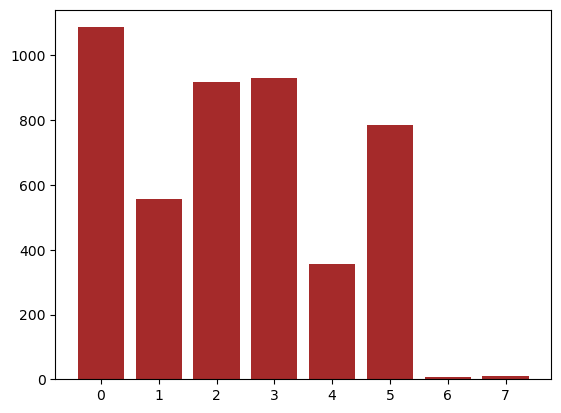

In [44]:
plt.bar(df.ExperienceInCurrentDomain.unique(),df.ExperienceInCurrentDomain.value_counts(),color='brown')

Text(0.5, 1.0, 'Experience Ratio In Current Domain')

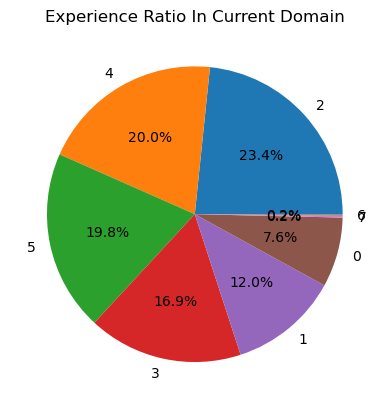

In [45]:
plt.pie(x=df.ExperienceInCurrentDomain.value_counts(),labels=df.ExperienceInCurrentDomain.value_counts().index,autopct="%1.1f%%")
plt.title("Experience Ratio In Current Domain")

Text(0.5, 1.0, 'New Joiners across different cities')

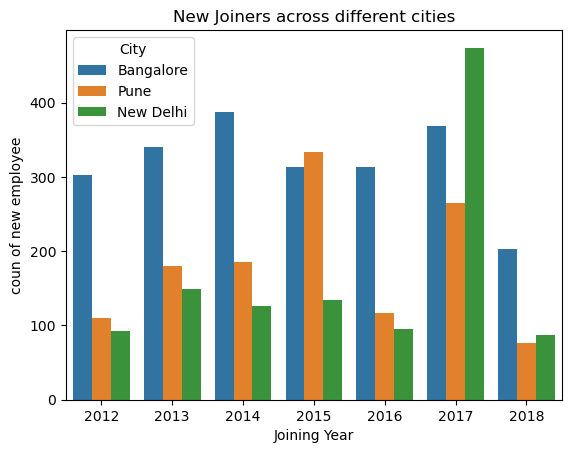

In [46]:
#Bivariate analysis
sns.countplot(x='JoiningYear',hue='City',data=df,)
plt.xlabel("Joining Year")
plt.ylabel("coun of new employee")
plt.title("New Joiners across different cities")

In [47]:
le=LabelEncoder()

In [48]:
df['Education']=le.fit_transform(df['Education'])
df['City']=le.fit_transform(df.City)
df['Gender']=le.fit_transform(df['Gender'])
df['EverBenched']=le.fit_transform(df['EverBenched'])

In [49]:
df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
5,0,2016,0,3,22,1,0,0,0
6,0,2015,1,3,38,1,0,0,0
7,0,2016,0,3,34,0,0,2,1
8,0,2016,2,3,23,1,0,1,0
9,1,2017,1,2,37,1,0,2,0


In [50]:
target=df['LeaveOrNot']

In [51]:
X=df.drop(['LeaveOrNot'],axis='columns')

In [52]:
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2


In [53]:
y=target
y.head()

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

In [54]:
df.corr()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.142670,0.149903,-0.140741,-0.010611,-0.010889,-0.052249,-0.004463,0.080497
JoiningYear,0.142670,1.000000,0.051441,-0.096078,0.013165,-0.012213,0.049353,-0.036525,0.181705
City,0.149903,0.051441,1.000000,-0.295884,-0.030706,-0.168546,-0.007046,-0.009925,0.201058
PaymentTier,-0.140741,-0.096078,-0.295884,1.000000,0.007631,0.235119,0.019207,0.018314,-0.197638
Age,-0.010611,0.013165,-0.030706,0.007631,1.000000,-0.003866,-0.016135,-0.134643,-0.051126
Gender,-0.010889,-0.012213,-0.168546,0.235119,-0.003866,1.000000,0.019653,0.008745,-0.220701
EverBenched,-0.052249,0.049353,-0.007046,0.019207,-0.016135,0.019653,1.000000,0.001408,0.078438
ExperienceInCurrentDomain,-0.004463,-0.036525,-0.009925,0.018314,-0.134643,0.008745,0.001408,1.000000,-0.030504
LeaveOrNot,0.080497,0.181705,0.201058,-0.197638,-0.051126,-0.220701,0.078438,-0.030504,1.000000


<Figure size 1400x1000 with 0 Axes>

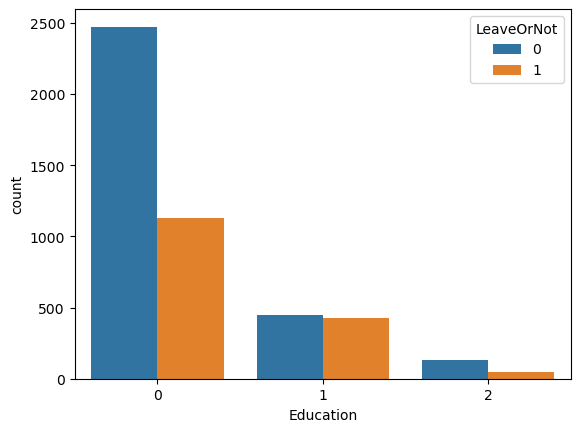

<Figure size 1400x1000 with 0 Axes>

In [55]:
sns.countplot(x='Education',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))
#0="Bachelors" 1="Masters" 2="P.hd"

<Axes: xlabel='JoiningYear', ylabel='count'>

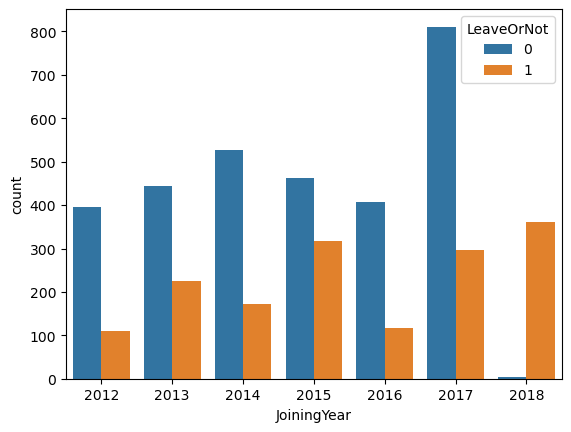

In [57]:
sns.countplot(x='JoiningYear',hue='LeaveOrNot',data=df)

<Axes: xlabel='City', ylabel='count'>

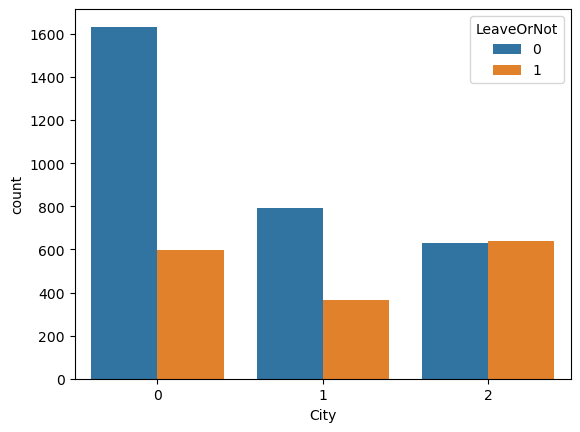

In [58]:
sns.countplot(x='City',hue='LeaveOrNot',data=df)
#'0'=Bangalore, '1'=New Delhi, '2'=Pune

<Figure size 1400x1000 with 0 Axes>

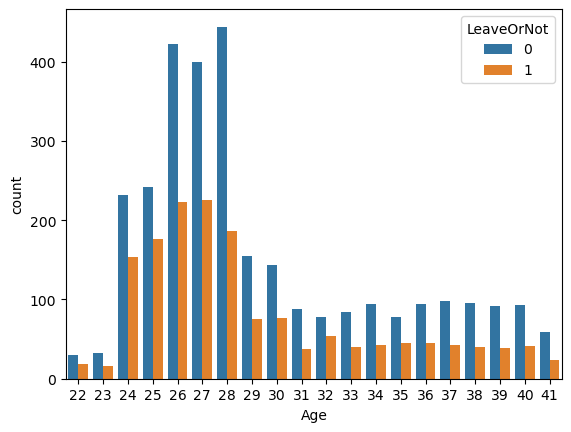

<Figure size 1400x1000 with 0 Axes>

In [59]:
sns.countplot(x='Age',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

<Figure size 1400x1000 with 0 Axes>

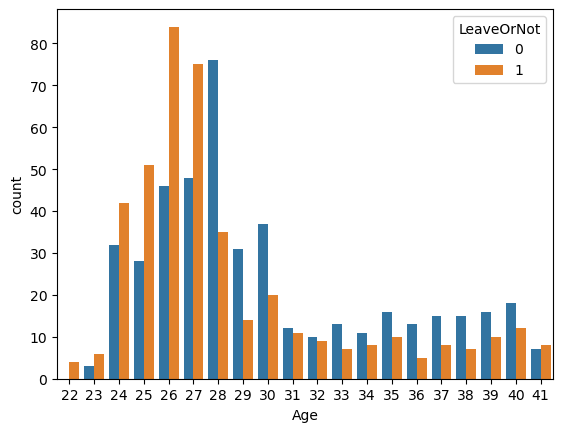

<Figure size 1400x1000 with 0 Axes>

In [60]:
sns.countplot(x = 'Age' , hue = 'LeaveOrNot', data = df.loc[df.Education == 1])
plt.figure(figsize = (14, 10))
#Employee who have masters

<Figure size 1400x1000 with 0 Axes>

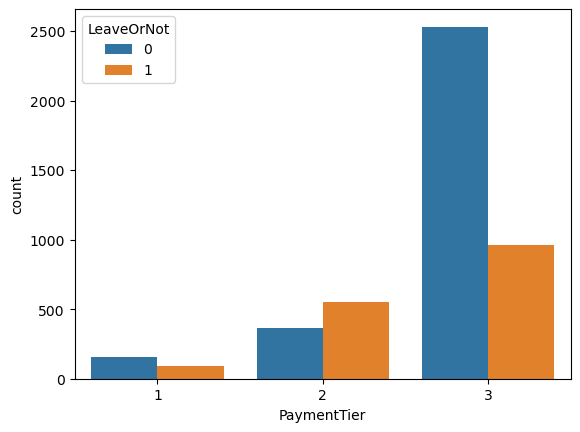

<Figure size 1400x1000 with 0 Axes>

In [61]:
sns.countplot(x="PaymentTier",hue="LeaveOrNot",data=df)
plt.figure(figsize=(14,10))

<Figure size 1400x1000 with 0 Axes>

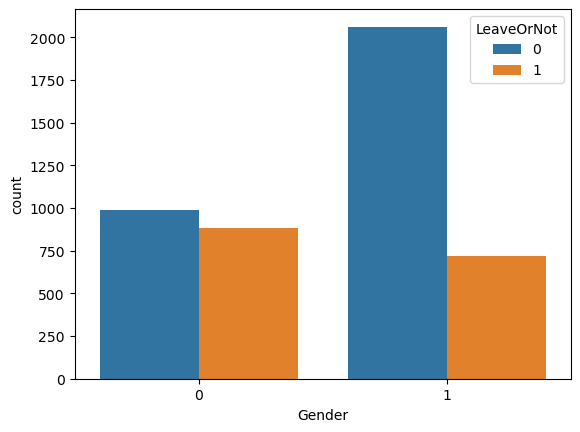

<Figure size 1400x1000 with 0 Axes>

In [62]:
sns.countplot(x='Gender',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))
#'0'=female '1'=male

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
len(X_test)

1396

In [65]:
len(X_train)

3257

In [66]:
#LogisticRegression
lr=LogisticRegression(max_iter=4000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7213467048710601

In [67]:
#RF
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.8502865329512894

In [68]:
#DT
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.830945558739255

In [69]:
#SV
sv = svm.SVC(C = 40, kernel = 'rbf')
sv.fit(X_train,y_train)
sv.score(X_test,y_test)

0.6590257879656161

In [ ]:
#GNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

In [70]:
#MNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_test,y_test)

0.6919770773638968

In [71]:
#Grid Search
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma = 'auto'),
             'params' : {
                 'C' : [1,10, 20, 30, 40],
                 'kernel' : ['rbf', 'linear', 'sigmoid']
             }
        }, 
     'random_forest' : {
         'model' : RandomForestClassifier(),
         'params': {
             'n_estimators' : [1,100,500,1000]
         }
     }, 
    'gaussian_nb' : { 
        'model' : GaussianNB(), 
        'params' : {} 
        
    },
    'multinomial_nb': {
        'model' : MultinomialNB(),
        'params' : {}
        
},
    
    'decision_tree_classifier' : {
        'model' : DecisionTreeClassifier(),
        'params' : {}
    }
}

In [72]:
score = []

for model_name, mp, in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    score.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
df2 = pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
df2 

,model,best_score,best_params
0,svm,0.809337,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.816394,{'n_estimators': 1000}
2,gaussian_nb,0.681913,{}
3,multinomial_nb,0.683143,{}
4,decision_tree_classifier,0.792142,{}


In [ ]:
#Conclusion: The best model in all models --->"RANDOM FOREST"